Este cuadernillo contiene todo el código empleado para realizar la parte de nuestro TFM relativa al análisis general y extracción de patrones del dataset Youtube Trending Videos Global. Contiene las siguientes secciones:

- Instalación de subprogramas y librerías
- Lectura del dataset
- Obtención y análisis de características de los datos

## Instalación de subprogramas y librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import isodate #para manejar formato de duración ISO 8601
import re #para manejar expresiones regulares
from textblob import TextBlob
from lingua import Language, LanguageDetectorBuilder

## Lectura del dataset

In [2]:
# LECTURA DEL ARCHIVO
df = pd.read_csv("videos_virales_final.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'videos_virales_final.csv'

## Obtención y análisis de características

In [23]:
df.columns

Index(['video_id', 'video_published_at', 'video_trending__date',
       'video_trending_country', 'video_title', 'video_description',
       'video_default_thumbnail', 'video_category_id', 'video_tags',
       'video_duration', 'video_definition', 'video_licensed_content',
       'video_view_count', 'video_like_count', 'video_comment_count',
       'channel_title', 'channel_description', 'channel_custom_url',
       'channel_published_at', 'channel_country', 'channel_view_count',
       'channel_subscriber_count', 'channel_video_count'],
      dtype='object')

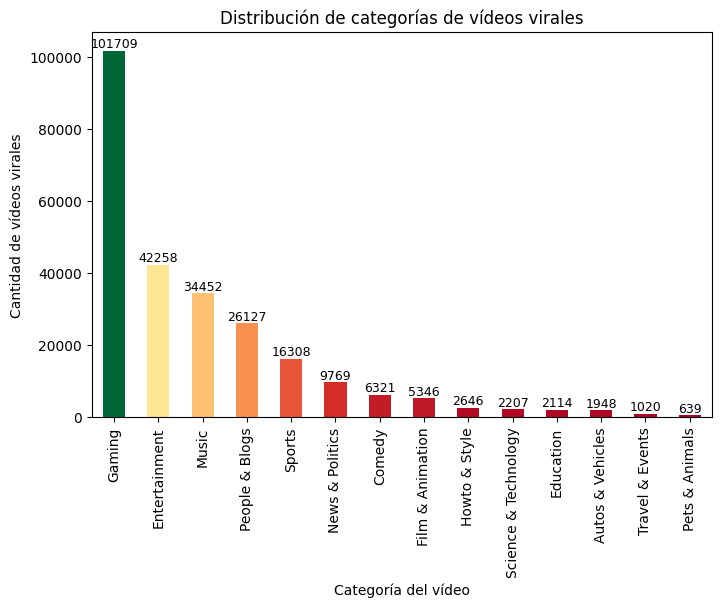

In [21]:
#Análisis de categorías
categories = df['video_category_id'].value_counts()
plt.figure(figsize=(8,5))
bars = categories.plot(kind='bar', color=plt.cm.RdYlGn(categories/categories.max()))

plt.title(f"Distribución de categorías de vídeos virales")
plt.xlabel("Categoría del vídeo")
plt.ylabel("Cantidad de vídeos virales")
plt.xticks(rotation=90)

for i, value in enumerate(categories):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.show()

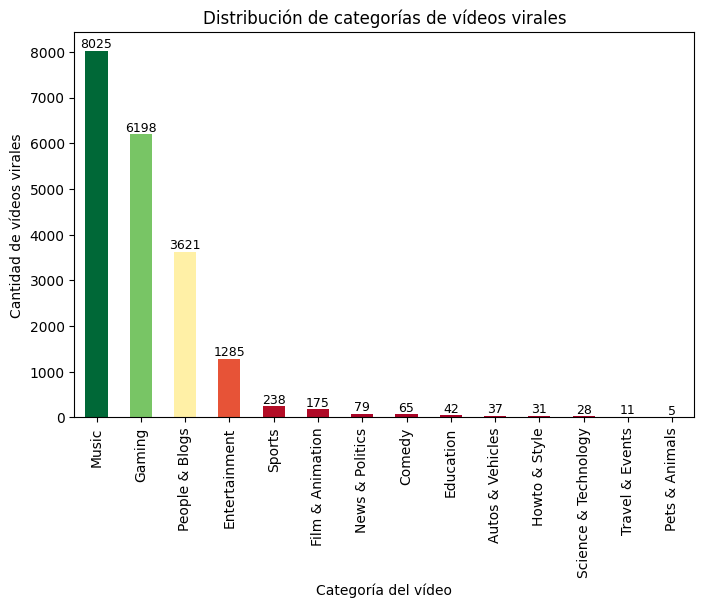

In [24]:
#Análisis de categorías (inferior a 20000 subs)
categories = df_20000['video_category_id'].value_counts()
plt.figure(figsize=(8,5))
bars = categories.plot(kind='bar', color=plt.cm.RdYlGn(categories/categories.max()))

plt.title(f"Distribución de categorías de vídeos virales")
plt.xlabel("Categoría del vídeo")
plt.ylabel("Cantidad de vídeos virales")
plt.xticks(rotation=90)

for i, value in enumerate(categories):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.show()

In [11]:
#Análisis de duración. Formato de la duración: ISO 8601
#Transformar todas las duraciones a segundos.
df["video_duration_segs"] = df["video_duration"].apply(lambda x: int(isodate.parse_duration(x).total_seconds()))
df["video_duration_segs"].describe()

count    253176.000000
mean       2657.370371
std        5571.080210
min           0.000000
25%         219.000000
50%         893.000000
75%        1892.000000
max      158651.000000
Name: video_duration_segs, dtype: float64

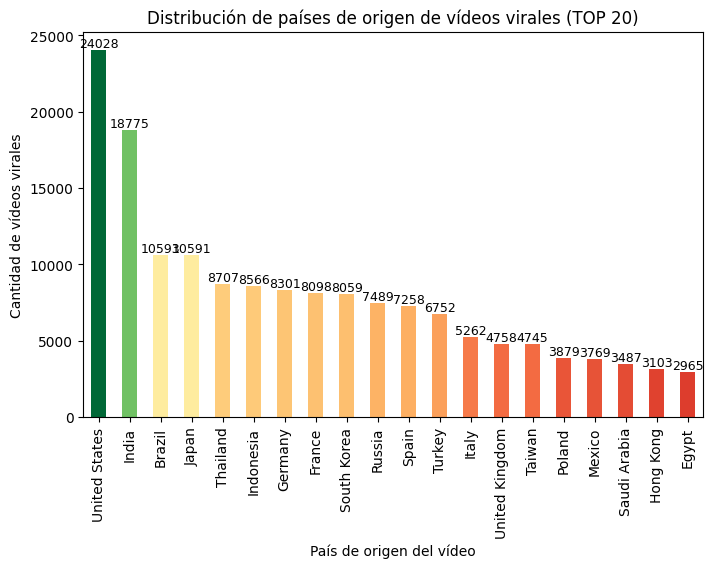

In [12]:
#País de origen de los vídeos
categories = df['channel_country'].value_counts()
categories = categories[0:20]
plt.figure(figsize=(8,5))
bars = categories.plot(kind='bar', color=plt.cm.RdYlGn(categories/categories.max()))

plt.title(f"Distribución de países de origen de vídeos virales (TOP 20)")
plt.xlabel("País de origen del vídeo")
plt.ylabel("Cantidad de vídeos virales")
plt.xticks(rotation=90)

for i, value in enumerate(categories):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.show()

In [27]:
#Columnas para el idioma
languages = [Language.ENGLISH, Language.FRENCH, Language.GERMAN, Language.SPANISH, Language.ITALIAN, 
             Language.PORTUGUESE, Language.ARABIC, Language.THAI, Language.HINDI, Language.CHINESE, Language.INDONESIAN, 
             Language.RUSSIAN, Language.POLISH, Language.JAPANESE]
detector = LanguageDetectorBuilder.from_languages(*languages).with_preloaded_language_models().build()
#detector = LanguageDetectorBuilder.from_all_languages().with_preloaded_language_models().build()
df['video_title_language'] = df['video_title'].apply(lambda x: str(detector.detect_language_of(str(x)))[9:])
df['vtl_confidence'] =  df['video_title'].apply(lambda x: detector.compute_language_confidence_values(str(x))[0].value)

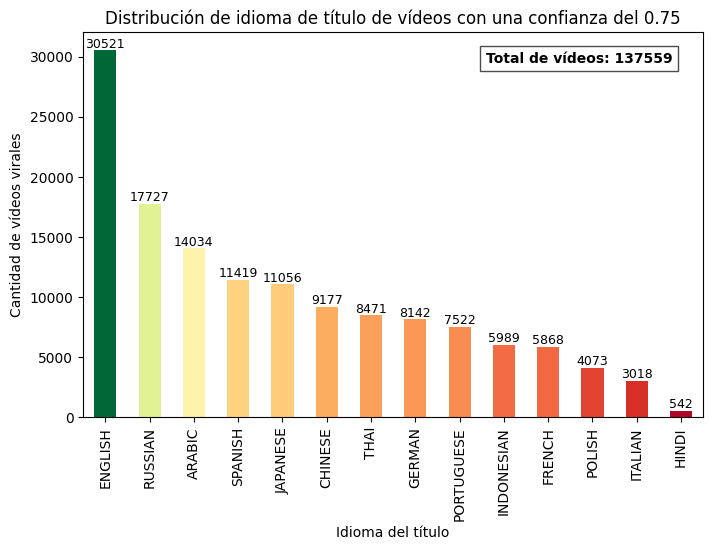

In [30]:
#Idioma de los títulos
confianza = 0.75
categories = df[df['vtl_confidence'] >= confianza]['video_title_language'].value_counts()
#categories = categories[0:20]
plt.figure(figsize=(8,5))
bars = categories.plot(kind='bar', color=plt.cm.RdYlGn(categories/categories.max()))

plt.title(f"Distribución de idioma de título de vídeos con una confianza del {confianza}")
plt.xlabel("Idioma del título")
plt.ylabel("Cantidad de vídeos virales")
plt.xticks(rotation=90)

plt.text(0.95, 0.95, f"Total de vídeos: {categories.sum()}", 
         ha="right", va="top", transform=plt.gca().transAxes,
         fontsize=10, fontweight="bold", bbox=dict(facecolor="white", alpha=0.7))

for i, value in enumerate(categories):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.show()